# **Find the main edges of image11.jpg.**

to Find the main edges of image11.jpg we can apply many techniques:

1_ Canny
2_prewitt
3_roberts
4_sobel
 

 we will apply them all and see the results








In [ ]:
import numpy as np


In [ ]:
import cv2
from matplotlib import pyplot as plt
# Read the image
image = cv2.imread('image11.jpg')  # Read as grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


(<Axes: title={'center': 'result image{200-230} '}>,
 (-0.5, 499.5, 573.5, -0.5),
 Text(0.5, 1.0, 'result image{200-230} '))

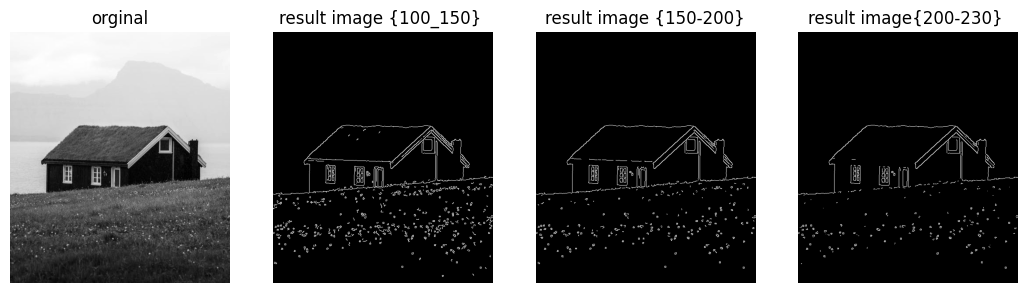

In [ ]:
#Canny
threshold1=150
threshold2=200
# Blur the image for better edge detection
img_gaussian = cv2.GaussianBlur(image,(3,3),20)
# Apply Canny edge detection
edges1 = cv2.Canny(img_gaussian , 100, 150)
edges2 = cv2.Canny(img_gaussian , 150, 200)
edges3 = cv2.Canny(img_gaussian , 200, 230)

fig, axes = plt.subplots(1, 4, figsize=(13,10))
# Display the original image and the detected edges
plt.subplot(1, 4, 1), plt.imshow(image,cmap = 'gray'), plt.axis('off'), plt.title('orginal')
plt.subplot(1, 4, 2), plt.imshow(edges1,cmap = 'gray'), plt.axis('off'), plt.title("result image {100_150} ")
plt.subplot(1, 4, 3), plt.imshow(edges2,cmap = 'gray'), plt.axis('off'), plt.title("result image {150-200}")
plt.subplot(1, 4, 4), plt.imshow(edges3,cmap = 'gray'), plt.axis('off'), plt.title("result image{200-230} ")

by using the canny You can experiment with different threshold values to achieve the desired edge detection results. but as we observe that with this tool it detect underirable edges and it ignor important edges. 

original image: min=0, max=255
x-derivative: min=-646, max=601, dtype=int16
y-derivative: min=-617, max=562, dtype=int16


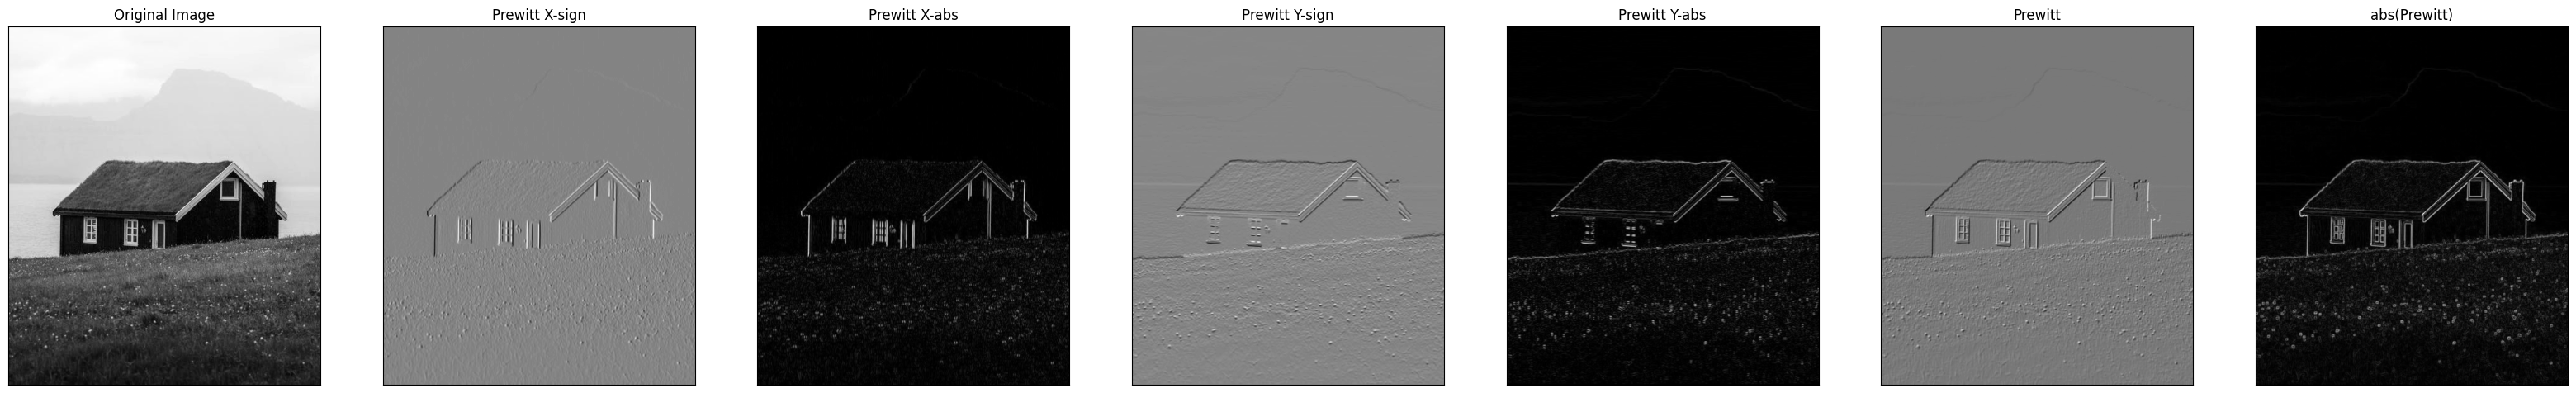

In [ ]:
#prewitt
img_max = np.max(image)
img_min = np.min(image)
print("original image: min={}, max={}".format(img_min, img_max))

#prewitt
kernelx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
kernely = kernelx.transpose()
img_prewittxs = cv2.filter2D(image, cv2.CV_16S, kernelx)
img_prewittys = cv2.filter2D(image, cv2.CV_16S, kernely)
print("x-derivative: min={}, max={}, dtype={}".format(np.min(img_prewittxs), np.max(img_prewittxs),img_prewittxs.dtype))
print("y-derivative: min={}, max={}, dtype={}".format(np.min(img_prewittys), np.max(img_prewittys),img_prewittxs.dtype))

img_prewittxa = abs(img_prewittxs)
img_prewittya = abs(img_prewittys)

fig, axes = plt.subplots(1, 7, figsize=(40,34))
plt.subplot(171),plt.imshow(image, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(172),plt.imshow(img_prewittxs, cmap = 'gray')
plt.title('Prewitt X-sign'), plt.xticks([]), plt.yticks([])
plt.subplot(173),plt.imshow(img_prewittxa, cmap = 'gray')
plt.title('Prewitt X-abs'), plt.xticks([]), plt.yticks([])
plt.subplot(174),plt.imshow(img_prewittys, cmap = 'gray')
plt.title('Prewitt Y-sign'), plt.xticks([]), plt.yticks([])
plt.subplot(175),plt.imshow(img_prewittya, cmap = 'gray')
plt.title('Prewitt Y-abs'), plt.xticks([]), plt.yticks([])
plt.subplot(176),plt.imshow(img_prewittxs + img_prewittys,  cmap = 'gray')
plt.title('Prewitt'), plt.xticks([]), plt.yticks([])
plt.subplot(177),plt.imshow(img_prewittxa + img_prewittya,  cmap = 'gray')
plt.title('abs(Prewitt)'), plt.xticks([]), plt.yticks([])

plt.show()

<ipython-input-6-96a144f1bae3>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141),plt.imshow(image, cmap = 'gray')
<ipython-input-6-96a144f1bae3>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142),plt.imshow(img_robertsx, cmap = 'gray')
<ipython-input-6-96a144f1bae3>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143),plt.imshow(img_robertsy, cmap = 'gray')


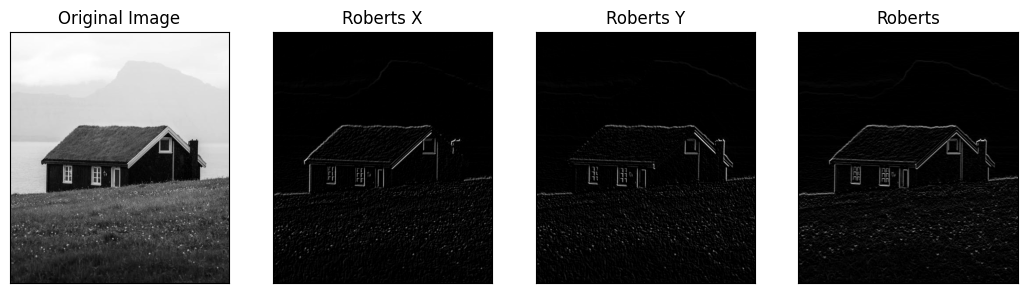

In [ ]:
img_gaussian = cv2.GaussianBlur(image,(3,3),0)

#roberts
kernelx = np.array([[1,0,0],[0,-1,0],[0,0,0]])
kernely = np.array([[0,1,0],[-1,0,0],[0,0,0]])
img_robertsx = cv2.filter2D(img_gaussian, -1, kernelx)
img_robertsy = cv2.filter2D(img_gaussian, -1, kernely)
img_roberts = img_robertsx + img_robertsy

fig, axes = plt.subplots(1, 3, figsize=(13,7))

plt.subplot(141),plt.imshow(image, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(img_robertsx, cmap = 'gray')
plt.title('Roberts X'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(img_robertsy, cmap = 'gray')
plt.title('Roberts Y'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(img_roberts,  cmap = 'gray')
plt.title('Roberts'), plt.xticks([]), plt.yticks([])

plt.show()

<ipython-input-7-28179534f00d>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141),plt.imshow(image, cmap = 'gray')
<ipython-input-7-28179534f00d>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142),plt.imshow(img_sobelx, cmap = 'gray')
<ipython-input-7-28179534f00d>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143),plt.imshow(img_sobely, cmap = 'gray')


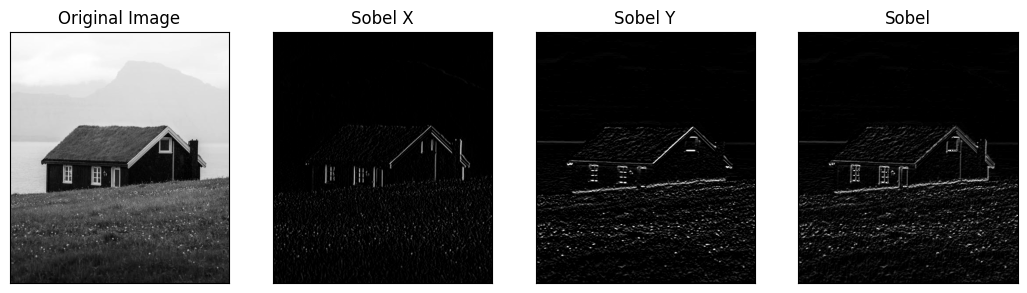

In [ ]:
#Blur the image to enhance the performance of the edge detection
img_gaussian = cv2.GaussianBlur(image,(3,3),0)

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=1)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=3)
img_sobel = img_sobelx + img_sobely

fig, axes = plt.subplots(1, 3, figsize=(13,7))

plt.subplot(141),plt.imshow(image, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(img_sobelx, cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(img_sobely, cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(img_sobel,  cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

plt.show()

after applying thes methods we choose the best algprithm to detect the edges.



# **Estimate the angle (with respect to the horizontal axis) of the diagonal edges of the roof.**

o estimate the angle of diagonal edges using the Hough Line Transform, you can follow these steps:

    Apply the Hough Line Transform on the detected edges:
        Detect edges in the image using an edge detection algorithm (e.g., Canny edge detection).
        Apply the Hough Line Transform on the detected edges to obtain the lines
        Filter out the lines corresponding to diagonal edges:

    Iterate through the detected lines and filter out lines that fall within a specific angle range corresponding to diagonal edges of the roof.
    Calculate the average angle of the remaining lines to estimate the angle of the diagonal edges
    Adjust the values of angle_min and angle_max to define the angle range for diagonal edges.


In [ ]:
import cv2
import numpy as np
from scipy import ndimage
from PIL import Image
import math
import matplotlib.pyplot as plt
import time
%matplotlib inline
import imutils
import pandas as pd
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.morphology import (erosion, dilation, closing, opening,area_closing, area_opening)
from skimage.measure import label, regionprops, regionprops_table
from IPython.display import display
import scipy.ndimage as ndi
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Angles found for every edge in roof:  [41.99999866427831, 42.999999830470706, 134.99999965837733, 42.999999830470706, 42.999999830470706, 136.0000076547589]


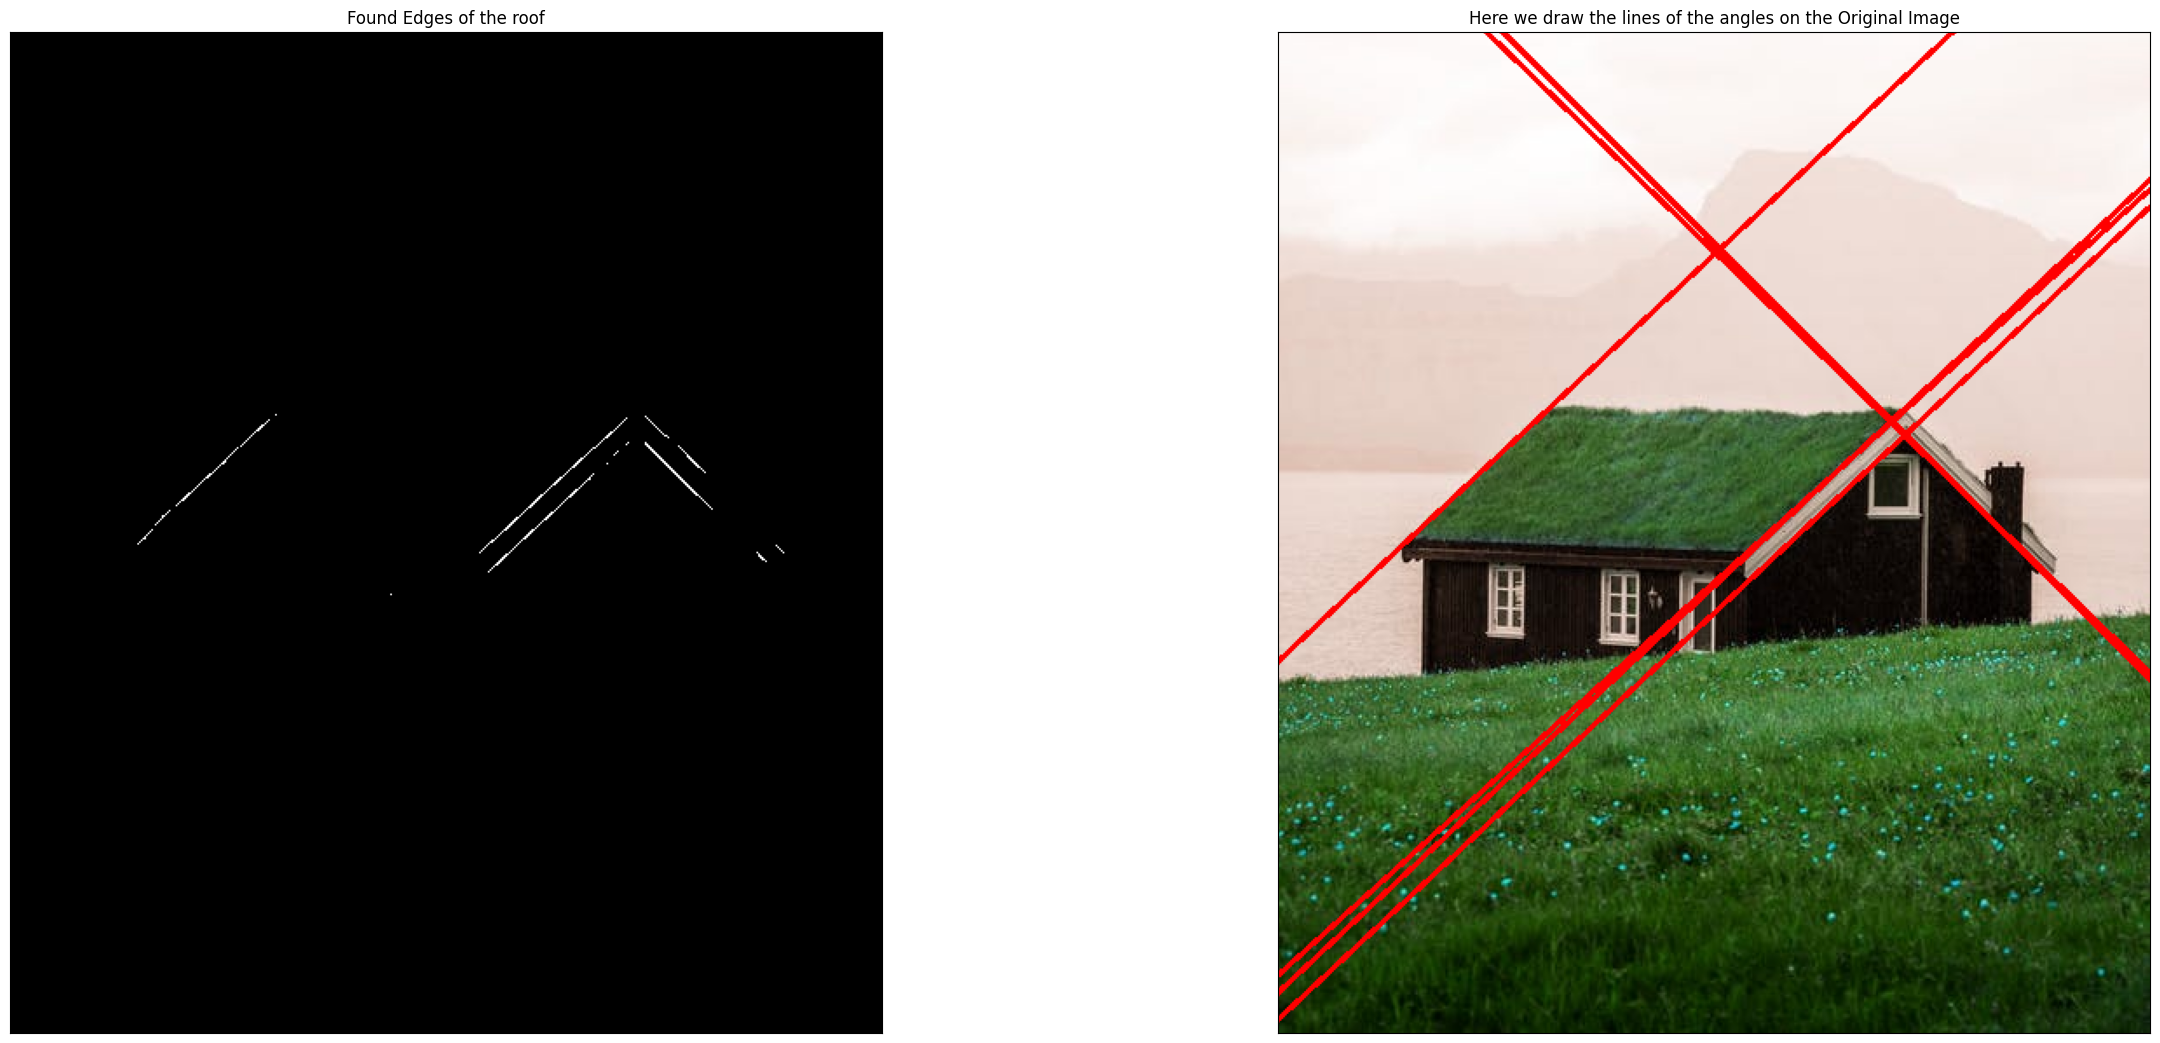

In [ ]:
# Load image in grayscale
image_color = cv2.imread("image11.jpg")
gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(5,5),20)
img =cv2.Canny(img_gaussian,100,150,apertureSize =3)
# construct the structure elements
a = np.zeros((7, 7), np.uint8)
np.fill_diagonal(a, 1)

b = np.zeros((7, 7), np.uint8)
np.fill_diagonal(b[::-1], 1)

one = cv2.erode(img, a, iterations=1)
second = cv2.erode(img, b, iterations=1)

# construct the roof
roof = cv2.add(one, second)

# apply hough line transformation to detect the thetas that contribute most in respective lines
lines = cv2.HoughLines(roof, 1, np.pi / 180, 55)

edge_degrees = []
for line in lines:
    for rho, theta in line:
        # append every degree value that match with hough lines transform

        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        
        theta_degrees = math.degrees(theta)

        if theta_degrees< 90:
          angle = 90 - theta_degrees
        else:
          angle = 270 - theta_degrees

        # append the angles to a list
        edge_degrees.append(angle)
        cv2.line(image_color, (x1, y1), (x2, y2), (255, 0, 0), 2)
        

# graph plot     
fig, axes = plt.subplots(1, 2, figsize=(30,13))
plt.subplot(121),plt.imshow(roof, cmap = 'gray')
plt.title('Found Edges of the roof', fontsize=12), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_color, cmap = 'gray')
plt.title('Here we draw the lines of the angles on the Original Image', fontsize=12), plt.xticks([]), plt.yticks([])

print("Angles found for every edge in roof: ", edge_degrees)
plt.show()   

# **Find the corners of the image11.jpg.**

we aims to locate the windows in the original image by performing edge detection, corner detection, and morphological operations. The windows are identified based on the detected corners.

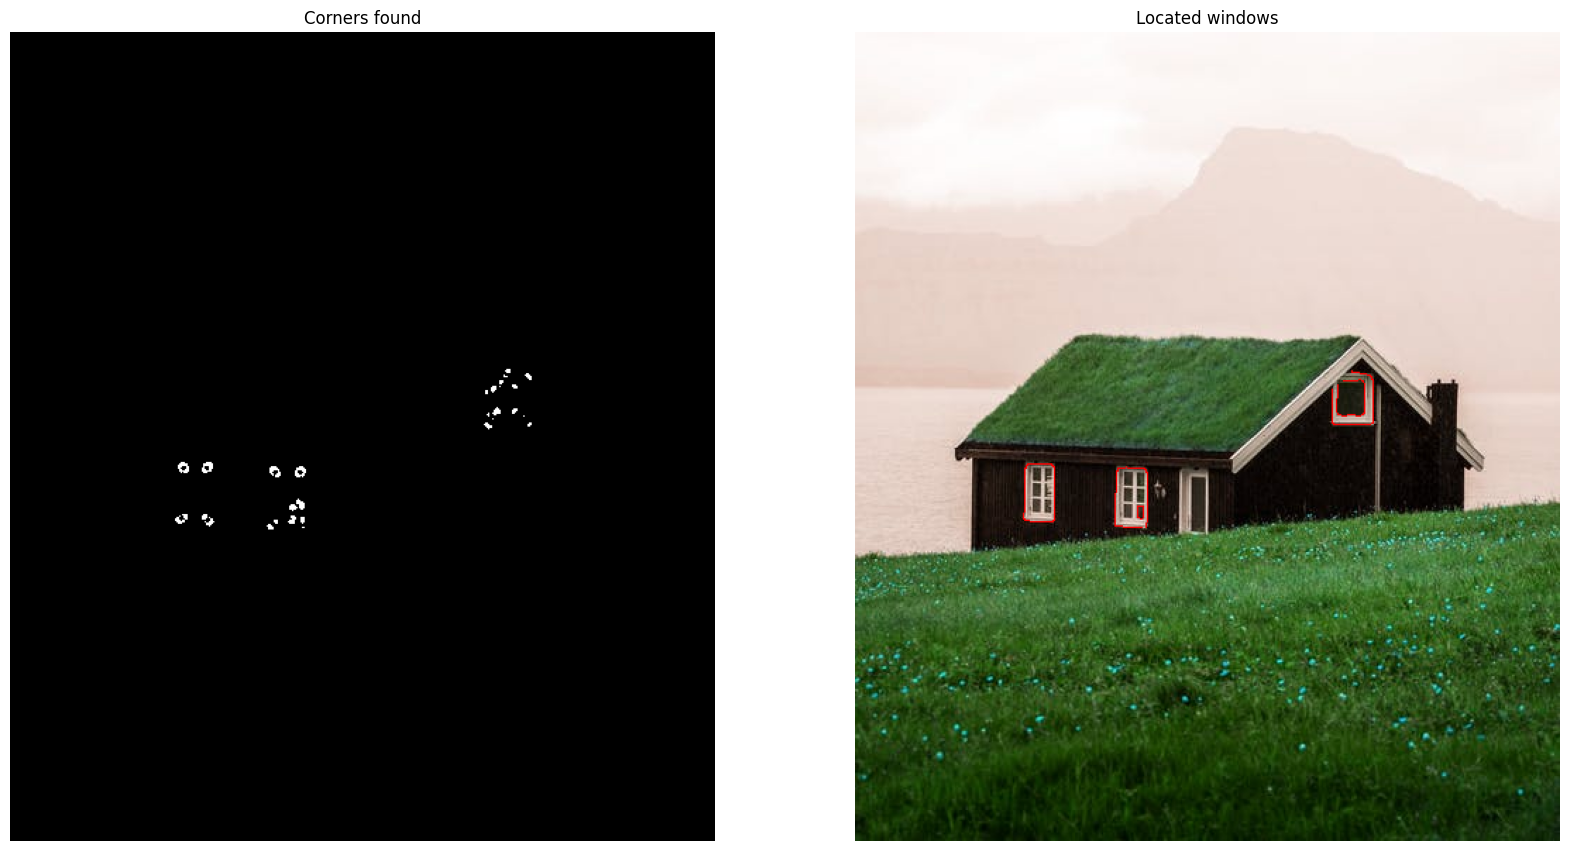

In [ ]:
# method that performs reconstruction
def reconstruction(original_image, seed_image, dilation_matrix):
    temp = seed_image
    for i in range(500):
        temp = cv2.dilate(temp, dilation_matrix, iterations=1)
        temp = original_image * temp
    return temp


# open image with cv2 library.
image_color = cv2.imread("image11.jpg")
image = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Blur the image for  edge detection
image = cv2.GaussianBlur(image,(3,3),20)

#Set the denoise function to clear the field
image = cv2.fastNlMeansDenoising(image,None,30,5,30) # or ... 7, 15)

# Perform Canny Edge-Detection .
edges1 = cv2.Canny(image,100,402)
edges2 = cv2.Canny(image,100,520)

#subtract one image from the other to keep the windows only
edges = edges1 - edges2


# perform corner detection
image_float = np.float32(edges)
dst = cv2.cornerHarris(image_float, 2, 25, 0.001)

fig, axes = plt.subplots(1, 2)
plt.gcf().set_size_inches(20, 20)

# Threshold for an optimal value, it may vary depending on the image.
detected_corners = dst > 0.14 * dst.max()
detected_corners = np.where(detected_corners == True, 255, detected_corners)
detected_corners = detected_corners.astype('uint8')

# plot the corners found
plt.subplot(121), plt.imshow(detected_corners, cmap='gray'), plt.axis('off'), plt.title('Corners found')
edges[edges == 255] = 1

# perform reconstruction
temp = reconstruction(edges, detected_corners, np.ones((3, 3), np.uint8))

# point the areas in the original image
image_color[temp == 255] = [255, 0, 0]
plt.subplot(122), plt.imshow(image_color), plt.axis('off'), plt.title('Located windows')
plt.show()